
Use the Metropolis algorithm to sample $|\Psi_{1,0,0}(x,y,z)|^2$ and $|\Psi_{2,1,0}(x,y,z)|^2$ **in Cartesian coordinates** using an uniform transition probability $T(\vec{x}|\vec{y})$. Use the sampled positions to estimate $\left\langle r \right\rangle_{\Psi_{1,0,0}}$ and $\left\langle r \right\rangle_{\Psi_{2,1,0}}$. As usual, use data blocking and give an estimate of the statistical uncertainties.

<span style="color:red">Show a picture of your estimations of $\left\langle r \right\rangle_{\Psi_{1,0,0}}$ and $\left\langle r \right\rangle_{\Psi_{2,1,0}}$</span> and their uncertainties with a large number of *throws* $M$ (e.g. $M\ge 10^6$) as a function of the number of blocks, $N$</font>.

- Use Bohr radius units, $a_0$ for distances
- Choose the step of the uniform transition probability $T(\vec{x}|\vec{y})$ in order to obtain 50% of acceptance in both cases
- Choose a reasonable starting point in the 3D space and equilibrate your sampling before to start measuring the radius. What do you observe when you start very far from the origin?
- How large should be the number of Monte Carlo Metropolis steps in each block?
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math- If you use a multivariate normal transition probability $T(\vec{x}|\vec{y})$, i.e. a Gaussian for each coordinate, your result for $\left\langle r \right\rangle_{\Psi_{1,0,0}}$ and $\left\langle r \right\rangle_{\Psi_{2,1,0}}$ is equivalent?

In [1]:
%matplotlib notebook

0.5120439775888804
0.5028750287502876


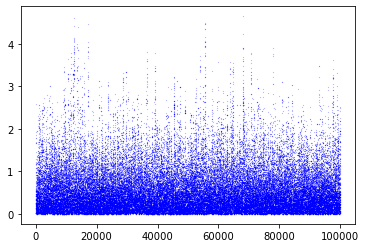

In [1]:

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

# campionare e^-r, r*e^-r*costheta

# campionare e^-x

def p(x):
    if x>0:
        return np.exp(-2*x)
    else:
        return 0
    
    
def xNuovo(x0):
    # estrai un nuovo con distribuz.
    # T(xNew,x0) (tentativa)
    return np.random.rand()*diametro-diametro/2 
    #tra -10 e 10

N=100000    

punti = np.zeros(0)

np.random.seed(0)
diametro = 1.6


x = 0
r = np.random.rand(N)


integral = 0

attempted = 0
accepted = 0

for i in range(1,N):
    
    xNew = x + xNuovo(x)
    attempted += 1
    
    integral += x
    punti = np.append(punti,x)
        
    A = 0
    if(p(x) == 0):
        A = 1 #transisco sicuramente da x a xNew
    else:
        A = min( 1,p(xNew)/p(x) )
    
    if r[i]<=A:
        x= xNew
        accepted += 1

    

plt.plot(punti,'bo',markersize=.1)
integral/= attempted
print(integral)
print(accepted/attempted)

(array([5.9719e+04, 2.3927e+04, 9.8670e+03, 3.9810e+03, 1.4060e+03,
        6.8000e+02, 2.2600e+02, 1.3200e+02, 5.0000e+01, 1.1000e+01]),
 array([0.        , 0.46526416, 0.93052833, 1.39579249, 1.86105666,
        2.32632082, 2.79158499, 3.25684915, 3.72211332, 4.18737748,
        4.65264165]),
 <BarContainer object of 10 artists>)

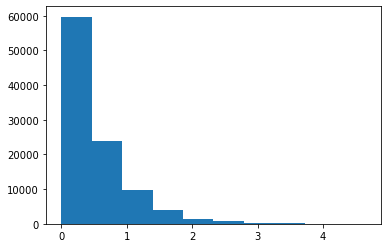

In [2]:
plt.hist(punti)

<>:43: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:43: SyntaxWarning: "is" with a literal. Did you mean "=="?
/tmp/ipykernel_6983/1198178635.py:43: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if(p(x) is 0):
/tmp/ipykernel_6983/1198178635.py:59: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


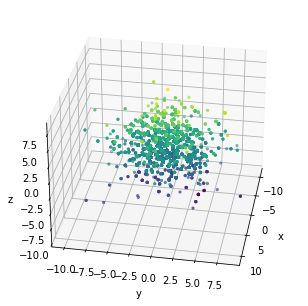

In [3]:

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

from mpl_toolkits.mplot3d import Axes3D

# campionare e^-r, r*e^-r*costheta

# campionare e^-x




def p(x):
    R = np.linalg.norm(x)
    return np.exp(-R)

diametro = 20 #diam. esplorazione

def xNuovo(x0):
    # estrai un nuovo con distribuz.
    # T(xNew,x0) (tentativa)
    return np.random.rand(3)*diametro - diametro/2
    #tra -10 e 10

N=10000    
    
punti = np.array([[0,0,0]])

np.random.seed(1)


x= np.array([[0,0,0]])
r = np.random.rand(N)

integrale = 0

for i in range(1,N):
    
    xNew = x + xNuovo(x)

    if(p(x) is 0):
        A = 1
    else:
        A = min( 1,p(xNew)/p(x) )
    
    if r[i]<=A:
        x= xNew
    punti = np.append(punti,x,axis=0)
    
    R = np.linalg.norm(x)
    integrale += np.exp(-R)

integrale /= N


fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(punti[:,0], punti[:,1], punti[:,2], c=punti[:,2], marker='.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(30, 10)
plt.show()

In [4]:
integrale

0.18253460271481514